# PROJECT 3: MADELON DATA ANALYSIS

Author: William Buck

---


# UCI Data

"MADELON is a two-class classification problem with continuous input variables. The difficulty is that the problem is multivariate and highly non-linear... MADELON is an artificial dataset containing data points grouped in 32 clusters placed on the vertices of a five dimensional hypercube and randomly labeled +1 or -1. The five dimensions constitute 5 informative features. 15 linear combinations of those features were added to form a set of 20 (redundant) informative features. Based on those 20 features one must separate the examples into the 2 classes (corresponding to the +-1 labels). We added a number of distractor feature called 'probes' having no predictive power. The order of the features and patterns were randomized." - From the [UCI Website](http://archive.ics.uci.edu/ml/datasets/madelon)

---

In [44]:
# The madelon_analyzer includes all of the imports and the madelone_analyzer class that has all functions I've 
# been using for analysis.
%run madelon_analyzer

# contains the train, test, and val sets as dataframes, as well as lists of features found during the feature 
# importance section
%run UCI_madelon_dataframes_and_features_lists 

%matplotlib inline

---

## Initial thoughts:

#### UCI Web Data

Since the artificially created Madelon data set has 5 important features and 15 combinations of those features, I decided to use the unsupervised learning technique where a regressor is used to compare every feature (column) against the rest of the dataset and find correlated features. I was able to identify exactly 20 features that have mean R^2 scores that are positive (I ran the regression multiple times and took the mean score), and most of them are very high, in the 0.8-0.9 range, for all three of the random data subsets. 

480/500 of the features in the Madelon dataset are noise, and all three of my samples returned identical lists of features when compared to the other features, so I believe that this is a good indication that I have found the 5 predictors and the 15 linear combinations.

Below is details this process and findings.

---

In [36]:
# small sample subsets for testing
s1_train_uci_10 = train_uci_df.sample(int(len(train_uci_df)*0.1), random_state=1)
s2_train_uci_10 = train_uci_df.sample(int(len(train_uci_df)*0.1), random_state=10)
s3_train_uci_10 = train_uci_df.sample(int(len(train_uci_df)*0.1), random_state=100)

In [37]:
MA_regression = madelon_analyzer(train_uci_df, val_uci_df)

In [39]:
s1_KNNR_score_df = MA_regression.mean_r2_for_all_features(s1_train_uci_10, KNeighborsRegressor)
pd.to_pickle(s1_KNNR_score_df, 'Data/s1_KNNR_score_df.p')
s1_KNNR_score_df[:20]

,r2_score,feature
105,0.367005,feat_105
128,0.328859,feat_128
493,0.323334,feat_493
338,0.265012,feat_338
64,0.247561,feat_64
453,0.244742,feat_453
336,0.234736,feat_336
455,0.20991,feat_455
433,0.205621,feat_433
153,0.167212,feat_153


In [40]:
# multiple regressors were used and they found the same features. Below is the first example using 
# DecisionTreeRegressor on the first sample subset.

s1_dtree_score_df = MA_regression.mean_r2_for_all_features(s1_train_uci_10, DecisionTreeRegressor)
pd.to_pickle(s1_dtree_score_df, 'Data/s1_dtree_score_df.p')
s1_dtree_score_df[:25]

,r2_score,feature
433,0.950393,feat_433
318,0.948537,feat_318
281,0.946645,feat_281
153,0.941721,feat_153
28,0.938253,feat_28
442,0.93649,feat_442
378,0.935396,feat_378
472,0.933099,feat_472
241,0.932783,feat_241
475,0.931758,feat_475


In [14]:
s2_dtree_score_df = MA_regression.mean_r2_for_all_features(s2_train_uci_10, DecisionTreeRegressor)
pd.to_pickle(s2_dtree_score_df, 'Data/s2_dtree_score_df.p')
s2_dtree_score_df[:25]

,r2_score,feature
281,0.953785,feat_281
48,0.944713,feat_48
153,0.938098,feat_153
451,0.937697,feat_451
28,0.93592,feat_28
318,0.932708,feat_318
378,0.932335,feat_378
475,0.930833,feat_475
336,0.928195,feat_336
105,0.928092,feat_105


In [15]:
s3_dtree_score_df = MA_regression.mean_r2_for_all_features(s3_train_uci_10, DecisionTreeRegressor)
pd.to_pickle(s3_dtree_score_df, 'Data/s3_dtree_score_df.p')
s3_dtree_score_df[:25]

,r2_score,feature
493,0.940601,feat_493
128,0.936577,feat_128
318,0.93505,feat_318
451,0.93491,feat_451
48,0.933219,feat_48
241,0.932901,feat_241
28,0.932648,feat_28
153,0.922717,feat_153
105,0.921241,feat_105
442,0.918617,feat_442


In [43]:
# Added all of my top 20 columns for the 3 random 10% samples to see if there was variation, and they all got the 
    # exact same features. This is a good sign!
    
s2_dtree_score_df = pd.read_pickle('Data/s2_dtree_score_df.p')
s3_dtree_score_df = pd.read_pickle('Data/s3_dtree_score_df.p')
    
s1_KNN_correlated_cols = list(s1_KNNR_score_df.head(20).index)

s1_correlated_cols = list(s1_dtree_score_df.head(20).index)  
s2_correlated_cols = list(s2_dtree_score_df.head(20).index)    
s3_correlated_cols = list(s3_dtree_score_df.head(20).index)  


len(set(s1_correlated_cols+s2_correlated_cols+s3_correlated_cols + s1_KNN_correlated_cols))

20

In [11]:
s_all_results_df = pd.DataFrame([sorted(s1_correlated_cols), sorted(s2_correlated_cols), sorted(s3_correlated_cols)]).T
s_all_results_df.columns = ['sample_1', 'sample_2', 'sample_3']
pd.to_pickle(s_all_results_df, 'all_samps_feature_results.p')
s_all_results_df

,sample_1,sample_2,sample_3
0,28,28,28
1,48,48,48
2,64,64,64
3,105,105,105
4,128,128,128
5,153,153,153
6,241,241,241
7,281,281,281
8,318,318,318
9,336,336,336


---

## Benchmark

The UCI dataset has two perfectly balanced classes, so my benchmark accuracy score is 0.5. When I perform a train_test_split on the full dataset and fit a LogisticRegression, I'm able to score marginally better than benchmark on the validation set with a train score of 0.74 and a validation score of 0.58.

I used a naive, cross validated KNeighborsClassifer as my benchmark score using the 20 features I identified above. This resulted in a validation score of 0.91333. This is a huge increase from the benchmark. This will be the score to beat as I try to eliminate the 15 rundandent features.

---

In [18]:
train_uci_df['target'].value_counts()

 1    1000
-1    1000
Name: target, dtype: int64

In [19]:
MA_benchmark = madelon_analyzer(train_uci_df, val_uci_df)

In [27]:
lr_benchmark = MA_benchmark.train_val_scorer_df_maker(train_uci_df.iloc[:,:-1].columns, 'all_feats',\
                                                     LogisticRegression).T
lr_benchmark

,train_score,val_score
all_feats,0.7405,0.58


In [28]:
top_20_score_benchmark = MA_benchmark.train_val_scorer_df_maker(top_20_real_features, 'top_20_features').T
top_20_score_benchmark

,train_score,val_score
top_20_features,0.9365,0.913333


In [75]:
# roc_auc_score using all features for benchmark

X_train = train_uci_df.iloc[:,:-1]
X_val = val_uci_df.iloc[:,:-1]
y_train = train_uci_df['target']
y_val = val_uci_df['target']

knc_params = {
    'n_neighbors':range(3,30,2)
}

rf_params = {
    'criterion':['gini','entropy'],
    'max_depth':[2,3,4,5]
}

knc_roc = GridSearchCV(KNeighborsClassifier(n_jobs=-1), knc_params)
rf_roc = GridSearchCV(RandomForestClassifier(n_jobs=-1), rf_params)

rf_roc.fit(X_train, y_train)
knc_roc.fit(X_train, y_train)

y_preds = knc_roc.predict(X_val)
y_proba = knc_roc.predict_proba(X_val)

y_preds_rf = rf_roc.predict(X_val)
y_proba_rf = rf_roc.predict_proba(X_val)

In [77]:
roc_auc_score(y_val, y_preds)

0.755

In [78]:
roc_auc_score(y_val, y_preds_rf)

0.67166666666666663

In [76]:
cm_knc = confusion_matrix(y_val, y_preds, labels=[1,-1])
cm_knc

array([[206,  94],
       [ 53, 247]])

---

## Features Selection

Using SelectKBest with k=5 on my 3 random data subsets, I was able to identify 8 unique features. Using SelectFromModel with the Lasso estimator, I was able to identify 9. Between these two lists of features, only 5 are the same. SelectFromModel returned 5 for the first dataset, 3 for the second, and 4 for the third.

I used GridSearchCV to tune my model hyperparameters and try various combinations of the important features I identified. Unfortunately, none of them scored better than benchmark.

---

In [14]:
# All of this information is in the 0_EDA notebook. Since it was bad information, I left it out to revisit later.
# You can find lists of the features that were identified below.

print(top_14_elasticnet_real_features, '\n',
top_12_real_features, '\n',
top_7_real_features, '\n',
top_5_real_features,)

[64, 105, 153, 241, 318, 336, 338, 378, 442, 453, 455, 472, 475, 493] 
 [48, 64, 105, 128, 241, 318, 336, 338, 378, 442, 453, 475] 
 [64, 128, 241, 336, 338, 378, 475] 
 [64, 336, 338, 378, 475]


In [15]:
sfm = SelectFromModel(ElasticNet())
sfm.fit(train_uci_df[top_20_real_features], train_uci_df.iloc[:,-1])
sfm_feats = np.where(sfm.get_support())[0]
sfm_cols = list(train_uci_df[top_20_real_features][sfm_feats].head().columns)
sfm_cols

['feat_48', 'feat_153', 'feat_378', 'feat_475']

In [16]:
ks = range(1,21)

new_df = pd.DataFrame()

for k in ks:
    MA = madelon_analyzer(train_uci_df, val_uci_df)

    a_dict = {}
    
    skb = SelectKBest(k=k)
    skb.fit(train_uci_df[top_20_real_features], train_uci_df.iloc[:,-1])
    skb_feats = np.where(skb.get_support())[0]
    skb_cols = list(train_uci_df[top_20_real_features][skb_feats].head().columns)
    
    tra_val_df = MA.train_val_scorer_df_maker(skb_cols, '{} k'.format(k))
    
    if k == 1:
        new_df = tra_val_df
    
    new_df = pd.merge(tra_val_df, new_df, left_index=True, right_index=True)
    
new_df.T.sort_values('val_score', ascending=False)


,train_score,val_score
20 k,0.9365,0.913333
19 k,0.9365,0.906667
17 k,0.9360,0.903333
18 k,0.9345,0.898333
11 k,0.9195,0.893333
13 k,0.9270,0.891667
16 k,0.9290,0.890000
14 k,0.9285,0.890000
12 k,0.9260,0.890000
15 k,0.9275,0.888333


#### Below is the code from my original notebook:

In [74]:
%run madelon_analyzer

RFE = RFE(DecisionTreeClassifier(), n_features_to_select=5)

In [75]:
RFE.fit(train_uci_df[top_20_real_features], train_uci_df.iloc[:,-1:])

/opt/conda/lib/python3.6/site-packages/sklearn/utils/validation.py:547: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


RFE(estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
  n_features_to_select=5, step=1, verbose=0)

In [76]:
RFE_feats = np.where(RFE.get_support())[0]
RFE_cols = list(train_uci_df[top_20_real_features][RFE_feats].columns)
RFE_cols

['feat_28', 'feat_48', 'feat_105', 'feat_338', 'feat_475']

In [77]:
ma_rfe = madelon_analyzer(train_uci_df, val_uci_df)
RFE_cols_score_df = ma_rfe.train_val_scorer_df_maker(RFE_cols, 'RFE_cols', \
                                                     params={'n_neighbors':[1,3,5,7,9,11,13,15,17,19,21]})
RFE_cols_score_df

,RFE_cols
train_score,0.921500
val_score,0.896667


In [164]:
ma_rfe.best_params_

{'n_neighbors': 5}

## Using the madelon_analyzer to determine feature importance

So far, all of the features that were derived from my selection models have scored lower than just using all 20 of the features I identified during preprocessing. Using the madelon_analyzer I created, I've been able to score better than benchmark on a couple of occasion. I found that I was able to improve scores by using the ```madelon_analyzer.list_top_dipped_feats(model=KNeighborsClassifier, params='n_neighbors':range(1,20,2), random=True, noise=True)``` method and then repeating the process with a list of features that has the 'noisey' features removed. Below are the graphs that get output, showing the features that were removed marked in blue. by repeating this process several times, I was able to improve my validation score to 0.931667

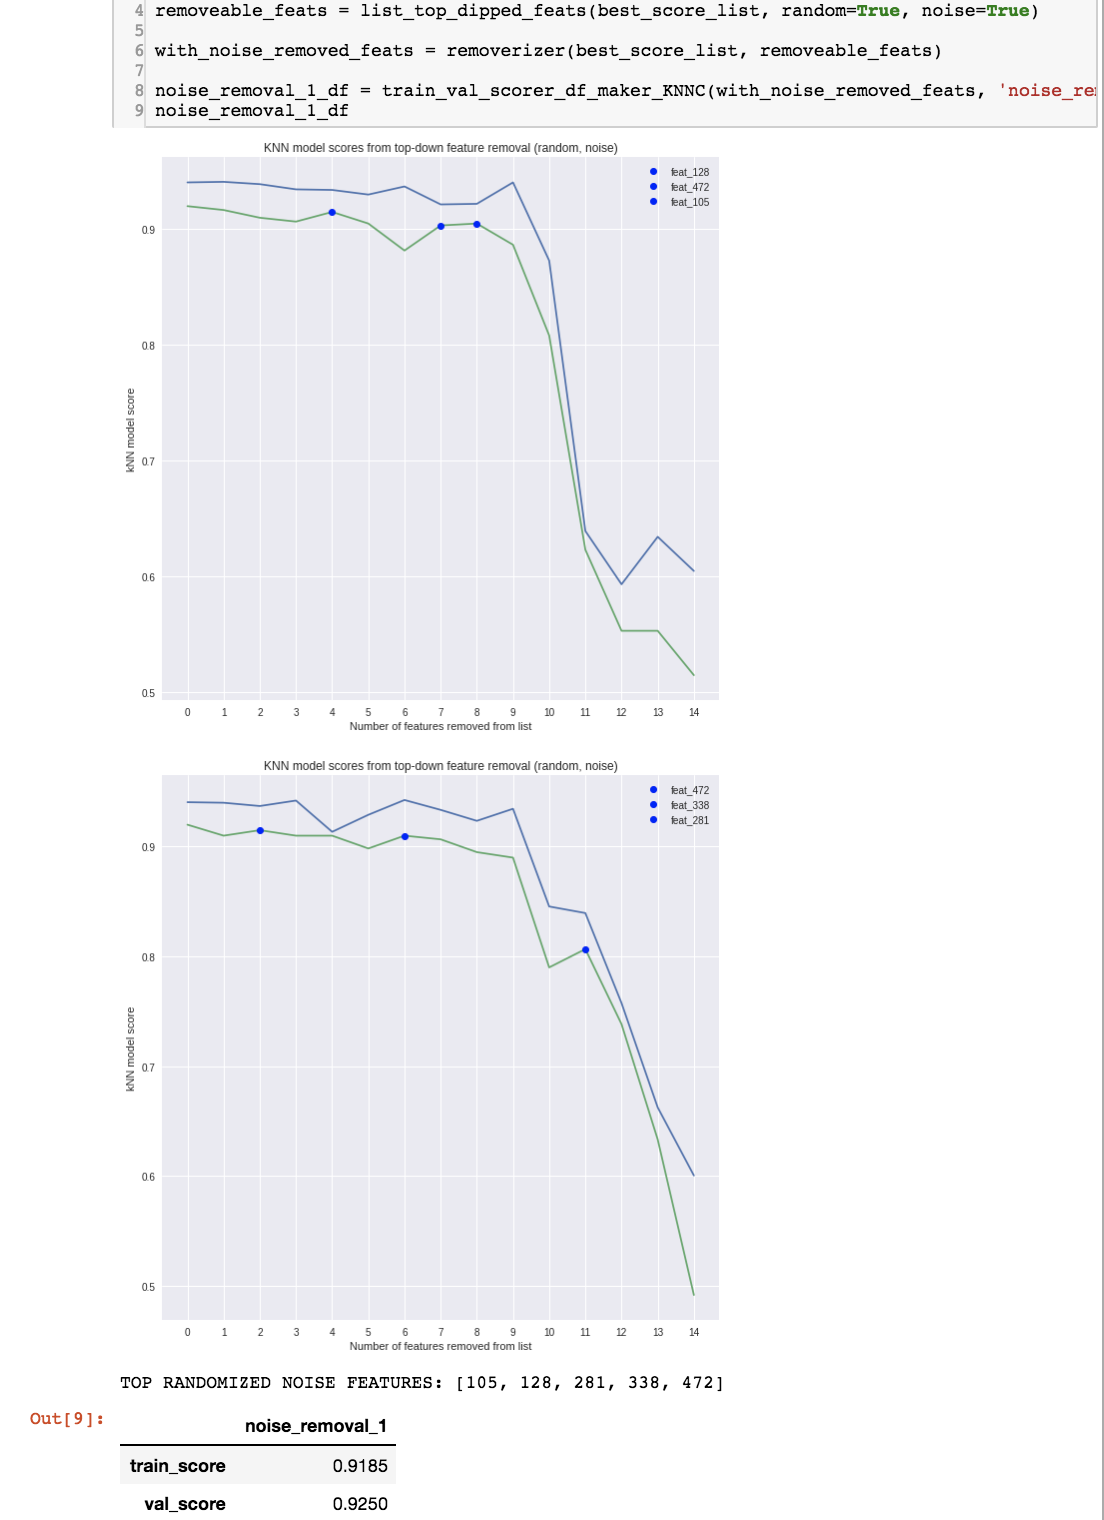

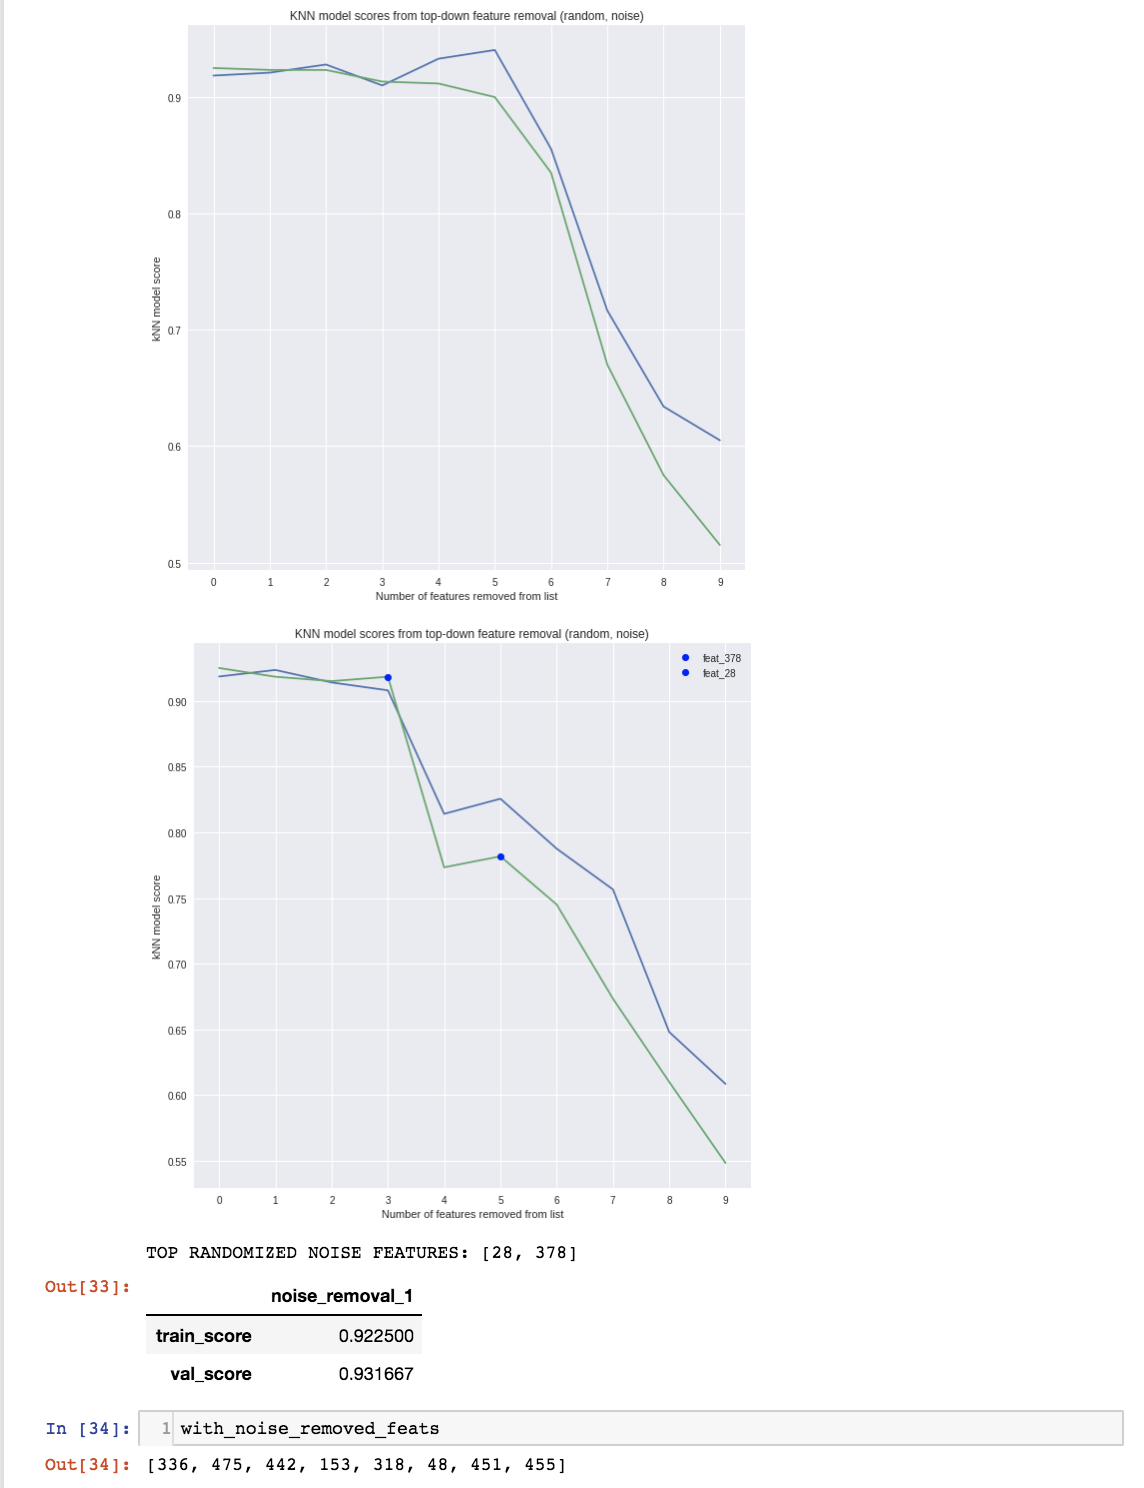

---

# Results - Top 5 and Highest Scores

I was able to narrow down the list to 8 features, but beyond that I was unsuccessful at raising my score with any less features. I scored a 0.91333 using ```[153, 451, 48, 475, 455]```, which I got after using the ```madelon_analyzer.brute_force_feature_combination_score_generator``` and testing every 5 feature combonation of the 8 features I found.

In [13]:
ma_top_scores = madelon_analyzer(train_uci_df, val_uci_df)

dfs = []

for i, l in enumerate(top_scores_list_of_lists):
    if i == 0:
        df = ma_top_scores.train_val_scorer_df_maker(l, 'Top 5 Score', \
                                                 params={'n_neighbors':range(1,20,2)})
    else:
        df = ma_top_scores.train_val_scorer_df_maker(l, 'Number {} score'.format(i), \
                                                 params={'n_neighbors':range(1,20,2)})
    dfs.append(df)

In [14]:
df_merge = pd.merge(dfs[0], dfs[1], left_index=True, right_index=True)
df_merge = pd.merge(df_merge, dfs[2], left_index=True, right_index=True)
top_scores_df = pd.merge(df_merge, dfs[3], left_index=True, right_index=True)

top_scores_df

,Top 5 Score,Number 1 score,Number 2 score,Number 3 score
train_score,0.942000,0.922500,0.9185,0.933000
val_score,0.913333,0.931667,0.9250,0.923333


In [32]:
brute_force_combos_df = ma_top_scores.brute_force_feature_combination_score_generator(best_score_list, model=KNeighborsClassifier, \
                                                              n_feats=5, params={'n_neighbors':[3,20,2]})

Number of combinations: 56


In [33]:
brute_force_combos_df[['train_score', 'val_score']].head()

,train_score,val_score
"[475, 153, 48, 451, 455]",0.942,0.913333
"[336, 153, 48, 451, 455]",0.9435,0.91
"[475, 153, 318, 48, 455]",0.944,0.91
"[336, 153, 318, 48, 455]",0.9465,0.906667
"[475, 442, 153, 48, 451]",0.925,0.9


In [34]:
five_list = brute_force_combos_df['features'][0]
ma_top_scores.train_val_scorer_df_maker(five_list, 'top_5', model=KNeighborsClassifier,\
                                       params={'n_neighbors':range(3,20,2)})

,top_5
train_score,0.942000
val_score,0.913333


In [2]:
ma_best = madelon_analyzer(train_uci_df, val_uci_df)

In [15]:
rf_params = {
    'n_estimators':[10,50,100,200],
    'max_features':['auto','log2'],
}

ma_best.train_val_scorer_df_maker([153, 451, 48, 475, 455], 'best_score_MA', \
                                  model=RandomForestClassifier, params=rf_params)

,best_score_MA
train_score,1.00
val_score,0.89


In [18]:
print(ma_best.model, '\n', ma_best.best_params_, '\n', ma_best.features)

<class 'sklearn.ensemble.forest.RandomForestClassifier'> 
 {'max_features': 'auto', 'n_estimators': 100} 
 [153, 451, 48, 475, 455]


In [145]:
ma_best.best_params_

{'max_features': 'log2', 'n_estimators': 100}

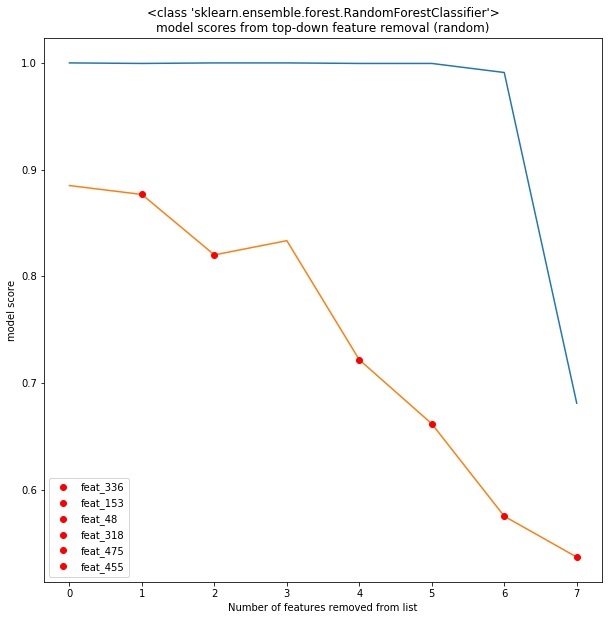

(   train_score  val_score
 0       1.0000   0.885000
 1       0.9995   0.876667
 2       1.0000   0.820000
 3       1.0000   0.833333
 4       0.9995   0.721667
 5       0.9995   0.661667
 6       0.9910   0.575000
 7       0.6810   0.536667, [336, 153, 48, 318, 475, 455])

In [3]:
ma_best.plot_top_down_feature_elimination_scores(best_score_list, \
                                               model=RandomForestClassifier, \
                                               params={'max_features':['log2'], 'n_estimators':[50]}, random=True)

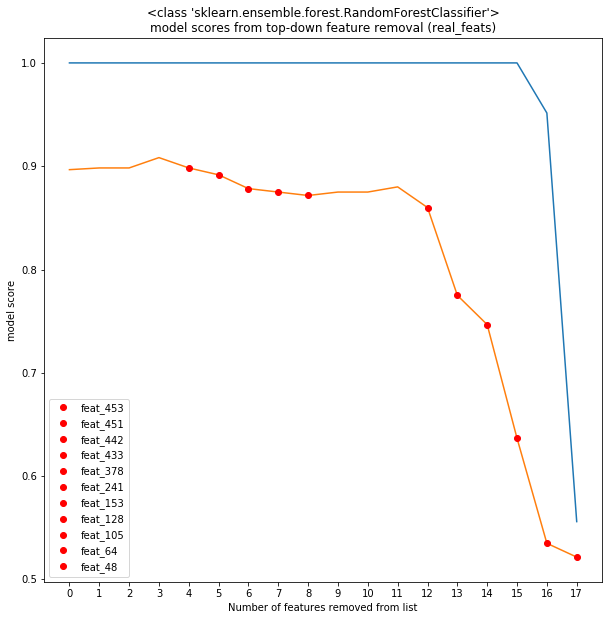

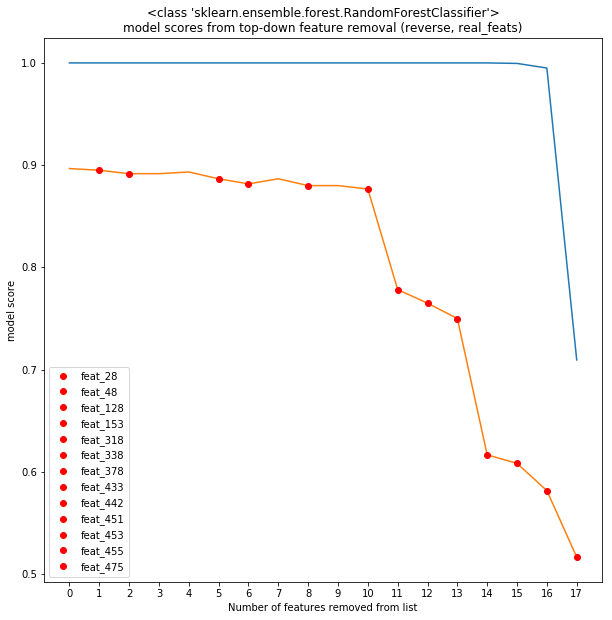

TOP REAL FEATURES: [28, 48, 128, 153, 318, 378, 433, 442, 451, 453]


[28, 48, 128, 153, 318, 378, 433, 442, 451, 453]

In [115]:
ma_best.list_top_dipped_feats(best_score_list, \
                               model=RandomForestClassifier, \
                               params=rf_params)

In [96]:
X_train = train_uci_df[best_score_list]
X_val = val_uci_df[best_score_list]
y_train = train_uci_df['target']
y_val = val_uci_df['target']

knc_params = {
    'n_neighbors':range(3,30,2),
    'p':[1,2]
    
}

rf_params = {
    'criterion':['gini','entropy'],
    'max_depth':[None,2,3,4,5,20,100],
    
}

knc_roc = GridSearchCV(KNeighborsClassifier(n_jobs=-1), knc_params)
rf_roc = GridSearchCV(RandomForestClassifier(n_jobs=-1), rf_params)

rf_roc.fit(X_train, y_train)
knc_roc.fit(X_train, y_train)

y_preds = knc_roc.predict(X_val)
y_proba = knc_roc.predict_proba(X_val)

y_preds_rf = rf_roc.predict(X_val)
y_proba_rf = rf_roc.predict_proba(X_val)

In [97]:
roc_auc_score(y_val, y_preds)

0.89333333333333342

In [98]:
roc_auc_score(y_val, y_preds_rf)

0.86333333333333329

In [100]:
rf_roc.best_params_, knc_roc.best_params_

({'criterion': 'entropy', 'max_depth': 20}, {'n_neighbors': 3, 'p': 2})

In [101]:
X_train = train_uci_df[top_5_best_score]
X_val = val_uci_df[top_5_best_score]
y_train = train_uci_df['target']
y_val = val_uci_df['target']

knc_params = {
    'n_neighbors':range(3,30,2),
    'p':[1,2]
    
}

rf_params = {
    'criterion':['gini','entropy'],
    'max_depth':[None,2,3,4,5,20,100],
    
}

knc_roc = GridSearchCV(KNeighborsClassifier(n_jobs=-1), knc_params)
rf_roc = GridSearchCV(RandomForestClassifier(n_jobs=-1), rf_params)

rf_roc.fit(X_train, y_train)
knc_roc.fit(X_train, y_train)

y_preds = knc_roc.predict(X_val)
y_proba = knc_roc.predict_proba(X_val)

y_preds_rf = rf_roc.predict(X_val)
y_proba_rf = rf_roc.predict_proba(X_val)

In [102]:
roc_auc_score(y_val, y_preds)

0.82333333333333347

In [103]:
roc_auc_score(y_val, y_preds_rf)

0.88833333333333331

In [104]:
rf_roc.best_params_, knc_roc.best_params_

({'criterion': 'entropy', 'max_depth': 20}, {'n_neighbors': 9, 'p': 1})

In [105]:
X_train = train_uci_df[top_20_real_features]
X_val = val_uci_df[top_20_real_features]
y_train = train_uci_df['target']
y_val = val_uci_df['target']

knc_params = {
    'n_neighbors':range(3,30,2),
    'p':[1,2]
    
}

rf_params = {
    'criterion':['gini','entropy'],
    'max_depth':[None,2,3,4,5,20,100],
    
}

knc_roc = GridSearchCV(KNeighborsClassifier(n_jobs=-1), knc_params)
rf_roc = GridSearchCV(RandomForestClassifier(n_jobs=-1), rf_params)

rf_roc.fit(X_train, y_train)
knc_roc.fit(X_train, y_train)

y_preds = knc_roc.predict(X_val)
y_proba = knc_roc.predict_proba(X_val)

y_preds_rf = rf_roc.predict(X_val)
y_proba_rf = rf_roc.predict_proba(X_val)

In [106]:
roc_auc_score(y_val, y_preds)

0.89333333333333342

In [107]:
roc_auc_score(y_val, y_preds_rf)

0.88666666666666671

In [108]:
rf_roc.best_params_, knc_roc.best_params_

({'criterion': 'entropy', 'max_depth': 20}, {'n_neighbors': 5, 'p': 1})

---

---